# **Titanic : Machine Learning from Disaster**

+ date : 2023.09.26.(화) <br>
+ author : 최호진 <br>
+ project : 개인 프로젝트<br>
+ github : https://github.com/Gansaw <br>
+ tistory : https://gansaw12.tistory.com <br>
+ email : gansaw12@gmail.com <br><br>

---



# 1. 목표 #

  + Titanic 데이터를 싸이킷런을 이용하여 데이터를 분석한다.
  + 생존 여부의 정보가 담겨 있는 train 데이터셋을 학습한다.
  + 학습 후 생존 여부의 정보가 담겨있지 않는 test 데이터셋을 예측한다.

a. 데이터 분석에 필요한 기본 library를 import한다.

    numpy
    matplotlib
    pandas
    seaborn
    sklearn

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn

b. pandas를 이용하여 titanic 데이터셋을 불러온다.

    train : train.csv
    test : test.csv

In [2]:
train = pd.read_csv("train.csv")
print(train)

test = pd.read_csv("test.csv")
print(test)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

c. head 함수를 이용하여 데이터프레임의 상위 5개의 정보를 확인한다.

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


d. info 함수를 이용하여 기본적인 데이터 구성을 파악한다.

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 2. 탐색적 데이터 분석(EDA)

  + 시각화를 통해 변수의 분포와 특성을 파악한다.
  + 탑승, 등급, 성별, 나이에 대한 정보를 확인한다.
  + Survived에서 0은 사망, 1은 생존을 나타낸다.

a. 전체 인원에 대한 생존률 확인

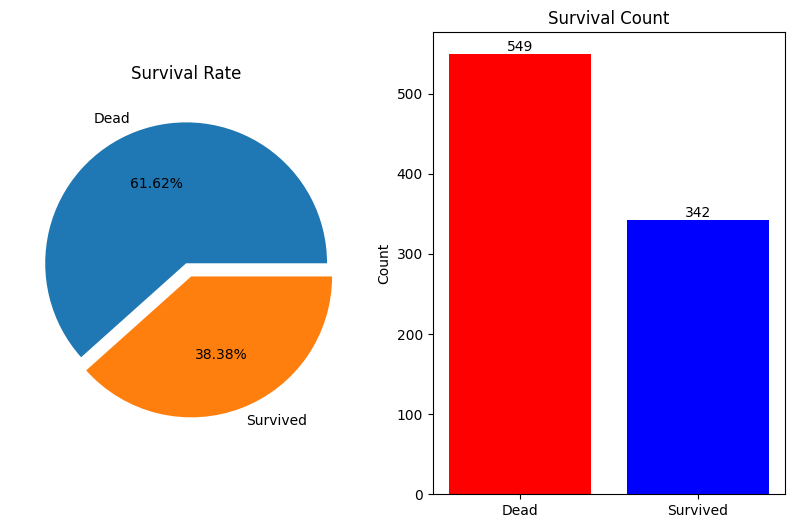

In [5]:
# 생존률 계산
survival_counts = train["Survived"].value_counts()
total_passengers = len(train)
survival_rate = survival_counts / total_passengers

# subplot 생성
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

# 생존률 그래프 (파이 그래프)
labels = ["Dead", "Survived"]
explode = (0,0.1)
ax[0].pie(survival_rate, explode = explode, labels=labels, autopct='%1.2f%%')
ax[0].set_title("Survival Rate")

# 생존 여부 그래프 (막대 그래프)
ax[1].bar(labels, survival_counts, color=["red", "blue"])
ax[1].set_ylabel("Count")
ax[1].set_title("Survival Count")

# 막대 그래프 위에 수치 표시 (written by chat-gpt)
for i, count in enumerate(survival_counts):
    ax[1].text(i, count, f'{count}', ha='center', va='bottom')

# 그래프 도출
plt.show()

b. 생존률에 대한 특정 관계 확인

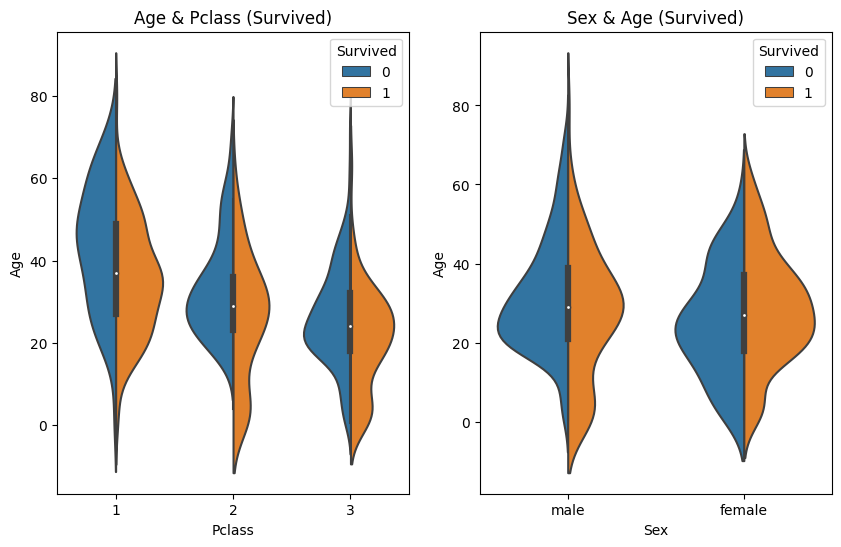

In [6]:
# 생존률 계산
survival_counts = train["Survived"].value_counts()
total_passengers = len(train)
survival_rate = survival_counts / total_passengers

# subplot 생성
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

# 바이올린 그래프 1 (Pclass & Age for Survived)
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=train, split=True, ax=ax[0])
ax[0].set_title('Age & Pclass (Survived)')

# 바이올린 그래프 2 (Sex & Age for Survived)
sns.violinplot(x='Sex', y='Age', hue='Survived', data=train, split=True, ax=ax[1])
ax[1].set_title('Sex & Age (Survived)')

plt.show()

c. 탐색적 데이터 분석(EDA) 결론

  + 전체 승객 891명 중 549명 사망(61.62%), 342명 생존(38.38%)
  + 1등급 객실(Pclass)의 30대(Age)가 생존률이 높음
  + 20~30대(Age) 여성(Sex)이 생존률이 높음

# 3. 데이터 전처리(Data Preprocessing)

  + 결측치를 확인하고 결측치가 있다면 제거하거나 대체한다.
  + 현재 Age, Embarked, Cabin에 결측치가 존재한다.(train.info()를 통해 확인 가능)
  + Cabin은 중요한 데이터가 아니므로 결측치를 처리하지 않는다.
  + Age는 결측치를 평균값을 이용하여 대체하는 방안으로 진행한다.(결측치가 많음)
  + Embarked는 결측치를 제거한다.(결측치가 적음)

a. Age 결측치(missing value)

  + 승객의 이름을 활용하여 177개의 Age 결측치를 처리한다.
  + 정규표현식을 사용하여 승객의 이니셜을 가져와서 이니셜 별 평균을 구한다.
  + pandas를 활용하여 데아터프레임에 이니셜 열을 추가한다.

In [7]:
# Inital 열 추가
train["Initial"] = train["Name"].str.extract("([A-Za-z]+)\.")
test["Initial"] = test["Name"].str.extract("([A-Za-z]+)\.")

# crosstab으로 표현
crosstab1 = pd.crosstab(train["Initial"], train["Sex"]).T.style.background_gradient(cmap="coolwarm")
crosstab2 = pd.crosstab(test["Initial"], test["Sex"]).T.style.background_gradient(cmap="coolwarm")

print("<train data>")
display(crosstab1)
print()
print("<test data>")
display(crosstab2)

<train data>


Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1



<test data>


Initial,Col,Dona,Dr,Master,Miss,Mr,Mrs,Ms,Rev
Sex,,,,,,,,,
female,0,1,0,0,78,0,72,1,0
male,2,0,1,21,0,240,0,0,2


b. Age 이상치(outlier)

  + 오타 및 불분명한 이니셜 존재
  + replace함수를 이용하여 이니셜에 사용되는 값으로 대체한다.

In [8]:
# 변경 사항 지정 (written by chat-gpt)
train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Others','Others','Others','Mr','Mr','Mr'],inplace=True)
test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Others','Others','Others','Mr','Mr','Mr','Mr'],inplace=True)

# 지정된 변경 값으로 대체
group1 = train.groupby('Initial')['Age'].mean()
group2 = test.groupby('Initial')['Age'].mean()

print("<train data>")
print(group1)
print(train["Initial"].unique())
print()
print("<test data>")
print(group2)
print(test["Initial"].unique())

<train data>
Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Others    45.888889
Name: Age, dtype: float64
['Mr' 'Mrs' 'Miss' 'Master' 'Others']

<test data>
Initial
Master     7.406471
Miss      21.774844
Mr        32.151351
Mrs       38.903226
Others    42.750000
Name: Age, dtype: float64
['Mr' 'Mrs' 'Miss' 'Master' 'Others']


c. Age 처리 결과

  + 이니셜 별 평균 나이를 구한다.
  + 평균 나이를 반올림하여 결측치를 대체한다.

In [9]:
train.loc[(train.Age.isnull()) & (train.Initial=="Master"), "Age"] = 5
train.loc[(train.Age.isnull()) & (train.Initial=="Miss"), "Age"] = 22
train.loc[(train.Age.isnull()) & (train.Initial=="Mr"), "Age"] = 33
train.loc[(train.Age.isnull()) & (train.Initial=="Mrs"), "Age"] = 36
train.loc[(train.Age.isnull()) & (train.Initial=="Others"), "Age"] = 46

# Age의 결측치가 모두 처리된 것을 확인
print("<train data>")
train.info()
print()

test.loc[(train.Age.isnull()) & (train.Initial=="Master"), "Age"] = 7
test.loc[(train.Age.isnull()) & (train.Initial=="Miss"), "Age"] = 22
test.loc[(train.Age.isnull()) & (train.Initial=="Mr"), "Age"] = 32
test.loc[(train.Age.isnull()) & (train.Initial=="Mrs"), "Age"] = 39
test.loc[(train.Age.isnull()) & (train.Initial=="Others"), "Age"] = 43

# Age의 결측치가 모두 처리된 것을 확인
print("<test data>")
test.info()

<train data>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Initial      891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB

<test data>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       -----------

d. Embarked 결측치(missing value)

  + 2개의 Embarked 결측치를 처리한다.
  + dropna 함수를 이용하여 제거한다.

In [10]:
train.dropna(subset=['Embarked'], inplace=True)
test.dropna(subset=['Embarked'], inplace=True)

# Embarked 결측치가 모두 처리된 것을 확인
print("<train data>")
train.info()
print()
print("<test data>")
test.info()

<train data>
<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
 12  Initial      889 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 97.2+ KB

<test data>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  

# 4. 특징 공학(Feature Engineering)

  + 데이터를 어떤 특징(feature)을 사용할 것인지 결정하는 작업
  + Scaling, Binning, One-Hot-Encoding, Transform, Dummy 등 다양한 방법이 있다.

a. Age Binning

  + 연속형 변수인 Age에 범위를 지정하여 범주형 변수로 변환한다.
  + ~15세, 16~30세, 31~50세, 51세~65세, 66세~ 총 5가지 범주로 구분한다.
  + 나이가 어릴수록 생존률이 높게 나타난 것을 확인할 수 있다.

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


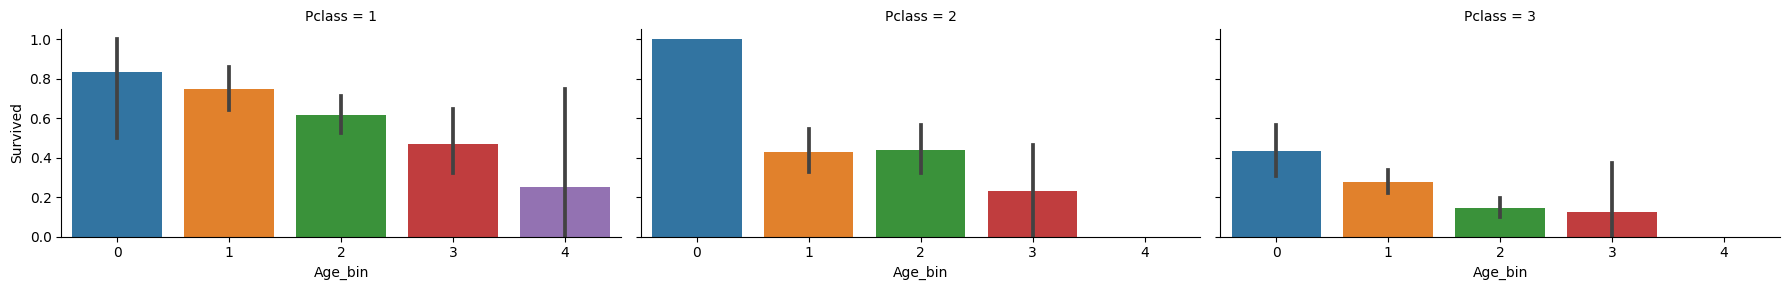

In [11]:
train["Age_bin"] = 0
train.loc[train["Age"]<=15, "Age_bin"] = 0
train.loc[(train["Age"]>15) & (train["Age"]<=30), "Age_bin"] = 1
train.loc[(train["Age"]>30) & (train["Age"]<=50), "Age_bin"] = 2
train.loc[(train["Age"]>50) & (train["Age"]<=65), "Age_bin"] = 3
train.loc[train["Age"]>65, "Age_bin"] = 4

test["Age_bin"] = 0
test.loc[test["Age"]<=15, "Age_bin"] = 0
test.loc[(test["Age"]>15) & (test["Age"]<=30), "Age_bin"] = 1
test.loc[(test["Age"]>30) & (test["Age"]<=50), "Age_bin"] = 2
test.loc[(test["Age"]>50) & (test["Age"]<=65), "Age_bin"] = 3
test.loc[test["Age"]>65, "Age_bin"] = 4

# PClass & Age_bin 그래프 시각화
graph = sns.catplot(x="Age_bin", y="Survived", data=train, kind="bar", height=3, aspect=2, col="Pclass", col_order=[1, 2, 3])

plt.show()

b. Fare Binning

  + Age와 마찬가지로 Fare에 범위를 지정하여 범주형 변수로 변환한다.
  + qcut 함수를 이용하여 Fare를 분위수(quantile)에 따라 나누었다.

In [12]:
train["Fare_range"] = pd.qcut(train["Fare"],4)
train.groupby(["Fare_range"])["Survived"].mean().to_frame().style.background_gradient(cmap="coolwarm")

,Survived
Fare_range,
"(-0.001, 7.896]",0.197309
"(7.896, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.577273


In [13]:
train["Fare_bin"] = 0
train.loc[train["Fare"]<=7.896, "Fare_bin"] = 0
train.loc[(train["Fare"]>7.896) & (train["Fare"]<=14.454), "Fare_bin"] = 1
train.loc[(train["Fare"]>14.454) & (train["Fare"]<=31.0), "Fare_bin"] = 2
train.loc[(train["Fare"]>31.0) & (train["Fare"]<=512.329), "Fare_bin"] = 3

# Age_bin이 제대로 생성되었는지 확인
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_bin,Fare_range,Fare_bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,"(-0.001, 7.896]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,"(31.0, 512.329]",3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,"(7.896, 14.454]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,"(31.0, 512.329]",3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2,"(7.896, 14.454]",1


c. Passanger Engineering

  + Parch와 Sibsp를 더한 값으로 같이 탑승한 전체 가족 수에 대한 column을 생성한다.
  + 혼자 탑승한 승객의 경우 One으로 표시한다.
  + 동승객 여부에 관해 생존율을 비교한다.
  + 함께 탑승한 가족이 3명인 경우 가장 높은 생존율을 보이는 것을 확인할 수 있다.

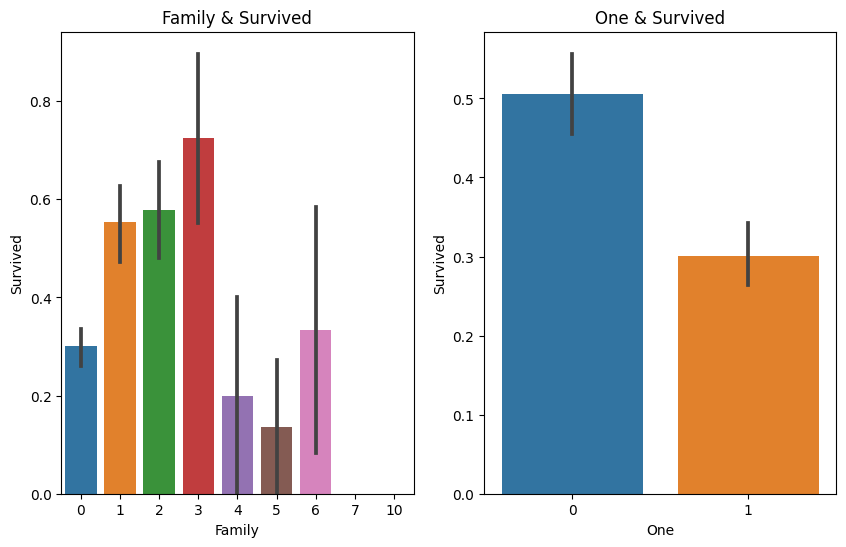

In [14]:
train["Family"] = train["Parch"] + train["SibSp"]
train["One"] = 0
train.loc[train.Family == 0, "One"] = 1

test["Family"] = test["Parch"] + test["SibSp"]
test["One"] = 0
test.loc[test.Family == 0, "One"] = 1

fig, ax = plt.subplots(1, 2, figsize=(10, 6))

# catplot이 안되서 barplot 함수를 이용하여 그래프 시각화
sns.barplot(x="Family", y="Survived", data=train, ax=ax[0])
ax[0].set_title("Family & Survived")

sns.barplot(x="One", y="Survived", data=train, ax=ax[1])
ax[1].set_title("One & Survived")

plt.show()

d. mapping

  + 범주형 변수를 mapping하여 0,1,2,3,...으로 변환한다.
  + 성별(Sex), 탑승위치(Embarked), 이니셜(Initial)

In [15]:
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Initial', 'Age_bin',
       'Fare_range', 'Fare_bin', 'Family', 'One'],
      dtype='object')


In [16]:
# Sex 카테고리 수치화 (male: 0, female: 1)
train["Sex"].replace(["male","female"],[0,1], inplace=True)

# Embarked 카테고리 수치화 (S: 0, C: 1, Q: 2)
train["Embarked"].replace(["S","C","Q"],[0,1,2], inplace=True)

# Initial 카테고리 수치화
train["Initial"].replace(["Mr","Mrs","Miss","Master","Others"],[0,1,2,3,4], inplace=True)


test["Sex"].replace(["male","female"],[0,1], inplace=True)
test["Embarked"].replace(["S","C","Q"],[0,1,2], inplace=True)
test["Initial"].replace(["Mr","Mrs","Miss","Master","Others"],[0,1,2,3,4], inplace=True)


train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_bin,Fare_range,Fare_bin,Family,One
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,"(-0.001, 7.896]",0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,1,2,"(31.0, 512.329]",3,1,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2,1,"(7.896, 14.454]",1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,1,2,"(31.0, 512.329]",3,1,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0,2,"(7.896, 14.454]",1,0,1


e. remove unimportant data

  + 불필요한 데이터셋을 제거하여 데이터분석을 효율적으로 진행한다.
  + Name, Age, Ticket, Fare, Cabin, Fare_range, PassengerId
  + 히트맵을 통하여 전처리한 변수 간 상관관계를 분석한다.

In [17]:
# 불필요한 데이터셋 제거

train.drop(["Name","Age","Ticket","Fare", "Fare_bin", "Cabin", "Fare_range","PassengerId"], axis=1, inplace=True)
test.drop(["Name","Age","Ticket","Fare","Cabin"], axis=1, inplace=True)

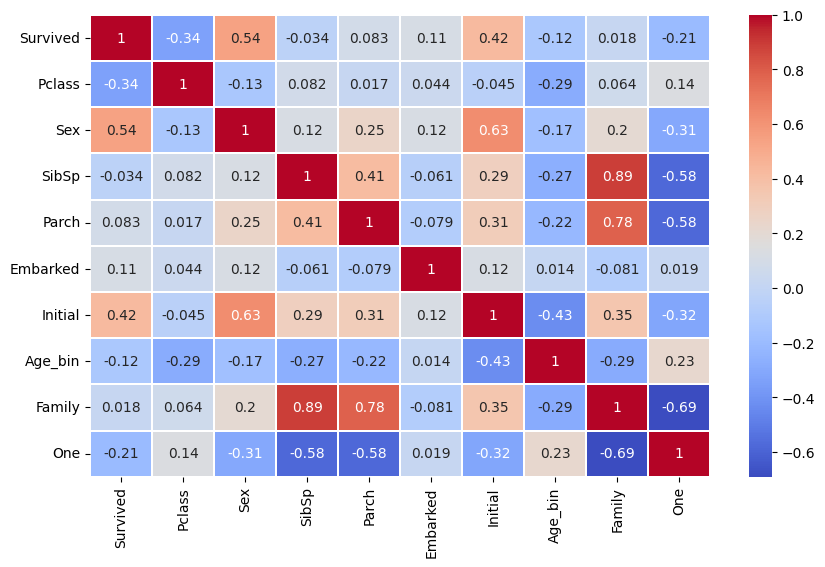

In [18]:
# tistory blog 참조하여 히트맵 제작
sns.heatmap(train.corr(), annot=True, cmap="coolwarm", linewidths=0.1, annot_kws={"size":10})
fig = plt.gcf()
fig.set_size_inches(10,6)
plt.xticks()
plt.yticks()
plt.show()

# 5. 데이터 모델링(Data Modeling)

  + Scikit-Learn을 이용하여 모델링을 진행한다.
  + 총 6가지 모델을 제작하여 각각의 결과를 비교해보았다.
  + Logistic Regression, Decision Tree, Support Vector Machine(SVM), Random Forest, K-Nearest Neighbors(KNN), Naive Bayes(베이즈 정리)

In [19]:
# Machine Learning
from sklearn.linear_model import LogisticRegression  # 로지스틱 회귀분석
from sklearn.tree import DecisionTreeClassifier  # 의사결정 트리
from sklearn.svm import SVC  # 서포트 벡터 머신
from sklearn.ensemble import RandomForestClassifier  # 랜덤 포레스트
from sklearn.neighbors import KNeighborsClassifier  # K-최근접 이웃
from sklearn.naive_bayes import GaussianNB  # 베이즈

# 교차검증
from sklearn.model_selection import KFold  # K-폴드 교차검정
kfold = KFold(n_splits=10)

# 정확도 측정
from sklearn.model_selection import cross_val_score

a. 결과 설정

  + 생존 결과는 따로 표시한다.
  + 정확도 평가는 Accuracy를 사용한다.

In [20]:
learning = train["Survived"]
train = train.drop("Survived", axis=1)
scoring = "accuracy"

b. 모델 결과

  + 6개의 모델에 대한 결과값을 표시한다.
  + 가장 정확도가 높은 모델을 테스트 모델로 선정한다.

In [21]:
# 1. Logistic Regression
model1 = LogisticRegression()
score1 = cross_val_score(model1, train, learning, cv=kfold, n_jobs=1, scoring=scoring)
result1 = round(np.mean(score1)*100, 2)
print("Logistic Regression : ", result1)

# 2. Decision Tree
model2 = DecisionTreeClassifier()
score2 = cross_val_score(model2, train, learning, cv=kfold, n_jobs=1, scoring=scoring)
result2 = round(np.mean(score2)*100, 2)
print("Decision Tree : ", result2)

# 3. Support Vector Machine
model3 = SVC()
score3 = cross_val_score(model3, train, learning, cv=kfold, n_jobs=1, scoring=scoring)
result3 = round(np.mean(score3)*100, 2)
print("SVC : ", result3)

# 4. Random Forest
model4 = RandomForestClassifier(n_estimators = 13)
score4 = cross_val_score(model4, train, learning, cv=kfold, n_jobs=1, scoring=scoring)
result4 = round(np.mean(score4)*100, 2)
print("Random Forest : ", result4)

# 5. K Neighbors
model5 = KNeighborsClassifier(n_neighbors = 13)
score5 = cross_val_score(model5, train, learning, cv=kfold, n_jobs=1, scoring=scoring)
result5 = round(np.mean(score5)*100, 2)
print("Logistic Regression : ", result5)

# 6. GaussianNB(Bayes)
model6 = GaussianNB()
score6 = cross_val_score(model6, train, learning, cv=kfold, n_jobs=1, scoring=scoring)
result6 = round(np.mean(score6)*100, 2)
print("Logistic Regression : ", result6)

Logistic Regression :  79.98
Decision Tree :  80.88
SVC :  82.79
Random Forest :  80.43
Logistic Regression :  81.89
Logistic Regression :  80.65


c. 모델 선정 후 테스트

  + 정확도가 가장 높은 SVC를 선정한다.
  + test 데이터 전처리 및 특징 공학 적용 후 테스트를 진행한다.
  + 예측 결과를 result 데이터프레임에 담아서 결과를 확인한다.

In [22]:
test_model = SVC()
test_model.fit(train, learning)

res = test.drop("PassengerId", axis=1).copy()
prediction = test_model.predict(res)

result = pd.DataFrame({"PassengerId": test["PassengerId"], "Survived": prediction})
result.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


# 6. 결론(Conclusion)

  i. 생존율

    - 타이타닉 승객 중 약 38.38%가 생존하고 61.62%가 사망하였다.
    - 생존율은 여성이 남성보다 높았으며, 나이가 어릴수록 생존율이 높았다.

  ii. 화물칸 등급별 생존율:    

    - 등급이 높을수록 생존율이 높았다.

  iii. 나이와 생존율

    - 나이가 어린 승객들의 생존율이 높았다.
    - 15세 미만의 어린이들의 생존율이 가장 높았다.

  iv. 가족관계와 생존율

    - 가족과 함께 탑승한 승객들의 생존율이 가족 없이 혼자 탑승한 승객보다 높았다.
    - 3명의 가족과 함께 탑승한 경우 생존율이 가장 높게 나왔다.

  v. 선실(Cabin) 정보

    - 결측값이 많아서 선실 정보로는 정확한 분석이 어려웠다.
    - 따라서 생존 여부와의 강한 상관관계를 찾기에는 어려운 것으로 판단된다.

  vi. 이니셜(Initial) 정보

    - 승객의 이름에서 추출한 이니셜 정보를 활용하여 성별과 연관짓는다.
    - 해당 정보를 이용하여 생존율을 확인할 수 있다.

  vii. 머신러닝 모델

    - 머신러닝 모델을 통해 예측된 생존 여부는 다양한 특성들을 기반으로 예측이 진행된다.
    - 위의 결과는 모델의 성능 및 모델 종류, 그리고 하이퍼파라미터에 따라 결과는 달라질 수 있다.

# 7. 기타사항(Etc)

a. 참고 문서

  + [Kaggle/Titanic](https://www.kaggle.com/competitions/titanic)
  + [khusw_study/융합연구](https://github.com/SeoroMin/khusw_study/blob/master/%EC%9C%B5%ED%95%A9%EC%97%B0%EA%B5%AC/titanic.ipynb)